In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Activation

In [101]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
df = pd.read_excel('../data/default of credit card clients.xls', header=1, index_col =0)

#### [1] 데이터 불러오기

In [103]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [104]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [105]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [106]:
# 결측치 확인
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [107]:
df_01 = df.copy()

In [108]:
df_01['BILL_AMT'] = df_01['BILL_AMT1'] + df_01['BILL_AMT2'] + df_01['BILL_AMT3']+ df_01['BILL_AMT4'] + df_01['BILL_AMT5']+ df_01['BILL_AMT6']
df_01['PAY_AMT'] = df_01['PAY_AMT1'] + df_01['PAY_AMT2'] + df_01['PAY_AMT3']+ df_01['PAY_AMT4'] + df_01['PAY_AMT5']+ df_01['PAY_AMT6']

In [109]:
df_01.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_AMT,PAY_AMT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,7704,689
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,5000
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
4,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
5,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,109339,59049


In [110]:
# 인풋과 타겟 분리
X_data = df.iloc[:, :-1]
y_data = df.iloc[:,-1]

In [111]:
X_data.shape, y_data.shape

((30000, 23), (30000,))

In [112]:
y_data.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

#### [2] 데이터 전처리

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_data_scaled = scaler.transform(X_data)

#### [2] PCA

In [114]:
pca = PCA()
pca.fit(X_data_scaled)

PCA()

In [115]:
# 주성분 행렬
pca.singular_values_

array([443.04929774, 350.6420357 , 215.70539822, 210.16175361,
       175.37713289, 169.45792011, 165.00799458, 163.18238146,
       161.67090383, 153.25759279, 148.26882983, 143.12454352,
       130.87573497, 125.42606134, 110.04188243,  88.29841154,
        86.45145711,  75.23782289,  62.87756995,  45.87669015,
        34.97910792,  27.54735755,  26.39274393])

In [116]:
# 주성분 투영 후 분산 비율정도 설명
pca.explained_variance_ratio_

array([0.28448215, 0.17818817, 0.06743307, 0.06401154, 0.04457556,
       0.04161737, 0.03946035, 0.03859201, 0.03788041, 0.03404042,
       0.03186036, 0.02968788, 0.02482385, 0.02279956, 0.01754959,
       0.01129943, 0.01083167, 0.00820396, 0.00572984, 0.00305025,
       0.00177324, 0.00109979, 0.00100953])

# [3] 주성분 갯수 지정
----

[3-1] pca.explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC 갯수 계산

In [117]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)

# 누적값이 0.95 필요한 경우
d = np.argmax(cumsum >= 0.95) + 1
print(f'주성분 갯수(차원 : {d}')

주성분 갯수(차원 : 15


In [118]:
# 지정된 PC 갯수로 주성분 데이터 압축/융합
pca2 =PCA(n_components = d)
pca.fit(X_data_scaled)
X_data_PCA2 = pca.transform(X_data_scaled)

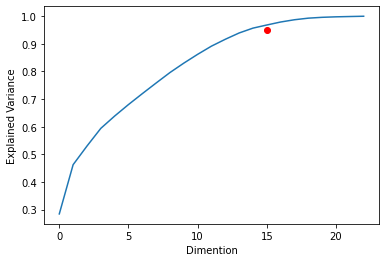

In [119]:
# 주성분 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.xlabel("Dimention")
plt.ylabel("Explained Variance")
plt.show()

[3] - 2 n_components = 0.0 ~ 1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC 갯수 자동 계산

In [120]:
pca3 = PCA(n_components = 0.95)
pca3.fit(X_data_scaled)
pca3.components_

array([[ 6.85184323e-02, -2.16564559e-02,  1.92056117e-02,
        -5.60026083e-03,  1.42315227e-02,  1.61081970e-01,
         1.94119641e-01,  2.00213038e-01,  2.07038234e-01,
         2.10960472e-01,  2.06412352e-01,  3.34385122e-01,
         3.45796995e-01,  3.49777117e-01,  3.53883216e-01,
         3.51752413e-01,  3.44514390e-01,  9.42312296e-02,
         7.86808761e-02,  8.63941854e-02,  7.77927170e-02,
         7.53544304e-02,  6.99481572e-02],
       [ 3.16322879e-01,  3.05947306e-02, -9.15225417e-02,
        -4.32509370e-02,  6.65780269e-02, -2.98123879e-01,
        -3.34820614e-01, -3.43894067e-01, -3.44581437e-01,
        -3.31600381e-01, -3.05793874e-01,  1.39815174e-01,
         1.40226985e-01,  1.46213389e-01,  1.45449832e-01,
         1.43760869e-01,  1.41872155e-01,  1.49109472e-01,
         1.39871902e-01,  1.51570097e-01,  1.41409070e-01,
         1.37190501e-01,  1.29396376e-01],
       [ 1.74535217e-02,  2.40375133e-02, -3.16425804e-01,
         4.53184753e-01, -4.6

In [121]:
X_data_PCA3 = pca3.transform(X_data_scaled)
X_data_PCA3.shape

(30000, 15)

In [122]:
df_X_data_PCA3 = pd.DataFrame(X_data_PCA3)

In [123]:
df_X_data_PCA3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data_PCA3, y_data,test_size=0.2,stratify= y_data,random_state=42)

In [125]:
x_train.shape, y_train.shape

((24000, 15), (24000,))

#### [4] 모델 생성

In [126]:
model = Sequential()

# Layer 추가
model.add(Dense(64,input_shape=(15,), name ='input'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

# 회귀 => 출력층
model.add(Dense(1,activation='sigmoid', name = 'output'))

In [127]:
model.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                1024      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_250 (Activation)  (None, 64)               0         
                                                                 
 dense_252 (Dense)           (None, 128)               8320      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_251 (Activation)  (None, 128)            

In [128]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd',metrics = ['acc'])

In [129]:
from tensorflow.keras.callbacks import EarlyStopping

In [130]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#patience:
patience_earlystop = 20
patience_ReduceLROnPlateau = 5

# filepath = 'best_weight.h5'
# mcp = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, save_weights_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=patience_earlystop)

# 모델의 개선이 없을 경우, Learning Rate 조절 (0.5씩 곱함)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=patience_ReduceLROnPlateau, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-5)

In [131]:
# Hyper Parameter
batch_size = 128
epochs = 100

his = model.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.15,
                    verbose=1,
                    callbacks=[learning_rate_reduction, earlystop])

Epoch 1/100
160/160 [==============================] - 3s 9ms/step - loss: 0.5258 - acc: 0.7781 - val_loss: 0.5084 - val_acc: 0.7931 - lr: 0.0100
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.4893 - acc: 0.7949 - val_loss: 0.4667 - val_acc: 0.8067 - lr: 0.0100
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.4755 - acc: 0.8023 - val_loss: 0.4571 - val_acc: 0.8108 - lr: 0.0100
Epoch 4/100
160/160 [==============================] - 2s 10ms/step - loss: 0.4708 - acc: 0.8021 - val_loss: 0.4507 - val_acc: 0.8111 - lr: 0.0100
Epoch 5/100
160/160 [==============================] - 2s 10ms/step - loss: 0.4666 - acc: 0.8046 - val_loss: 0.4480 - val_acc: 0.8119 - lr: 0.0100
Epoch 6/100
160/160 [==============================] - 2s 10ms/step - loss: 0.4630 - acc: 0.8075 - val_loss: 0.4469 - val_acc: 0.8119 - lr: 0.0100
Epoch 7/100
160/160 [==============================] - 2s 10ms/step - loss: 0.4579 - acc: 0.8074 - val_loss: 0.4447 - val

In [132]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.4417 - acc: 0.8122


[0.441740483045578, 0.812166690826416]

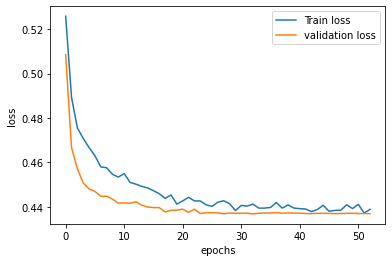

In [133]:
# loss 비교
plt.plot(his.epoch, his.history['loss'],label='Train loss')
plt.plot(his.epoch, his.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

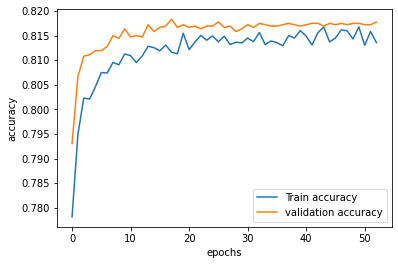

In [134]:
# acc 비교
plt.plot(his.epoch, his.history['acc'],label='Train accuracy')
plt.plot(his.epoch, his.history['val_acc'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
#plt.ylim(0,1)
plt.legend()
plt.show()

# skikeras로 최적의 파라미터 찾기
---

In [135]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import numpy as np
from sklearn.datasets import make_classification
from tensorflow import keras

from scikeras.wrappers import KerasClassifier

In [137]:
def get_model(hidden_layer_dim,dropout):

    model = keras.models.Sequential()
    model.add(keras.layers.Dense(8,input_shape=(15,)))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(hidden_layer_dim))
    model.add(keras.layers.Activation("relu"))

    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation("sigmoid"))
    return model

clf = KerasClassifier(
    get_model,
    loss="binary_crossentropy",
    dropout=0.5,
    hidden_layer_dim=100,
    epochs=1
)

clf.fit(x_train, y_train)
y_proba = clf.predict_proba(x_train)

750/750 [==============================] - 1s 2ms/step


In [138]:
from sklearn.model_selection import GridSearchCV

params = {
    "hidden_layer_dim": [10],
    "loss": ["binary_crossentropy"],
    "optimizer": ["adam", "sgd"],
    "optimizer__learning_rate": [0.00001,0.001,0.001,0.01,0.1],
    "dropout":[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
}
gs = GridSearchCV(clf, params, refit=False, cv=3, scoring='accuracy')

gs.fit(x_train, y_train)
print(gs.best_score_, gs.best_params_)

250/250 [==============================] - 0s 2ms/step
0.8174166666666668 {'dropout': 0.1, 'hidden_layer_dim': 10, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer__learning_rate': 0.01}
